In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>Data Import & Overview</h1>

In [41]:
#Loading the dataset
cancer = pd.read_csv('cancer.csv')

#Print the first 5 rows of the dataframe.
cancer.head

<bound method NDFrame.head of       Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  Diagnosis  
0          4.148219              1          1  
1        

In [3]:
cancer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [4]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,50.320000,17.640968,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1500.0,0.490667,0.500080,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,1500.0,27.513321,7.230012,15.000291,21.483134,27.598494,33.850837,39.958688
Smoking,1500.0,0.269333,0.443761,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1500.0,0.508667,0.678895,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1500.0,4.897929,2.866162,0.002410,2.434609,4.834316,7.409896,9.994607
AlcoholIntake,1500.0,2.417987,1.419318,0.001215,1.210598,2.382971,3.585624,4.987115
CancerHistory,1500.0,0.144000,0.351207,0.000000,0.000000,0.000000,0.000000,1.000000
Diagnosis,1500.0,0.371333,0.483322,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
cancer.shape

(1500, 9)

In [6]:
cancer.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [7]:
cancer.duplicated().sum()

0

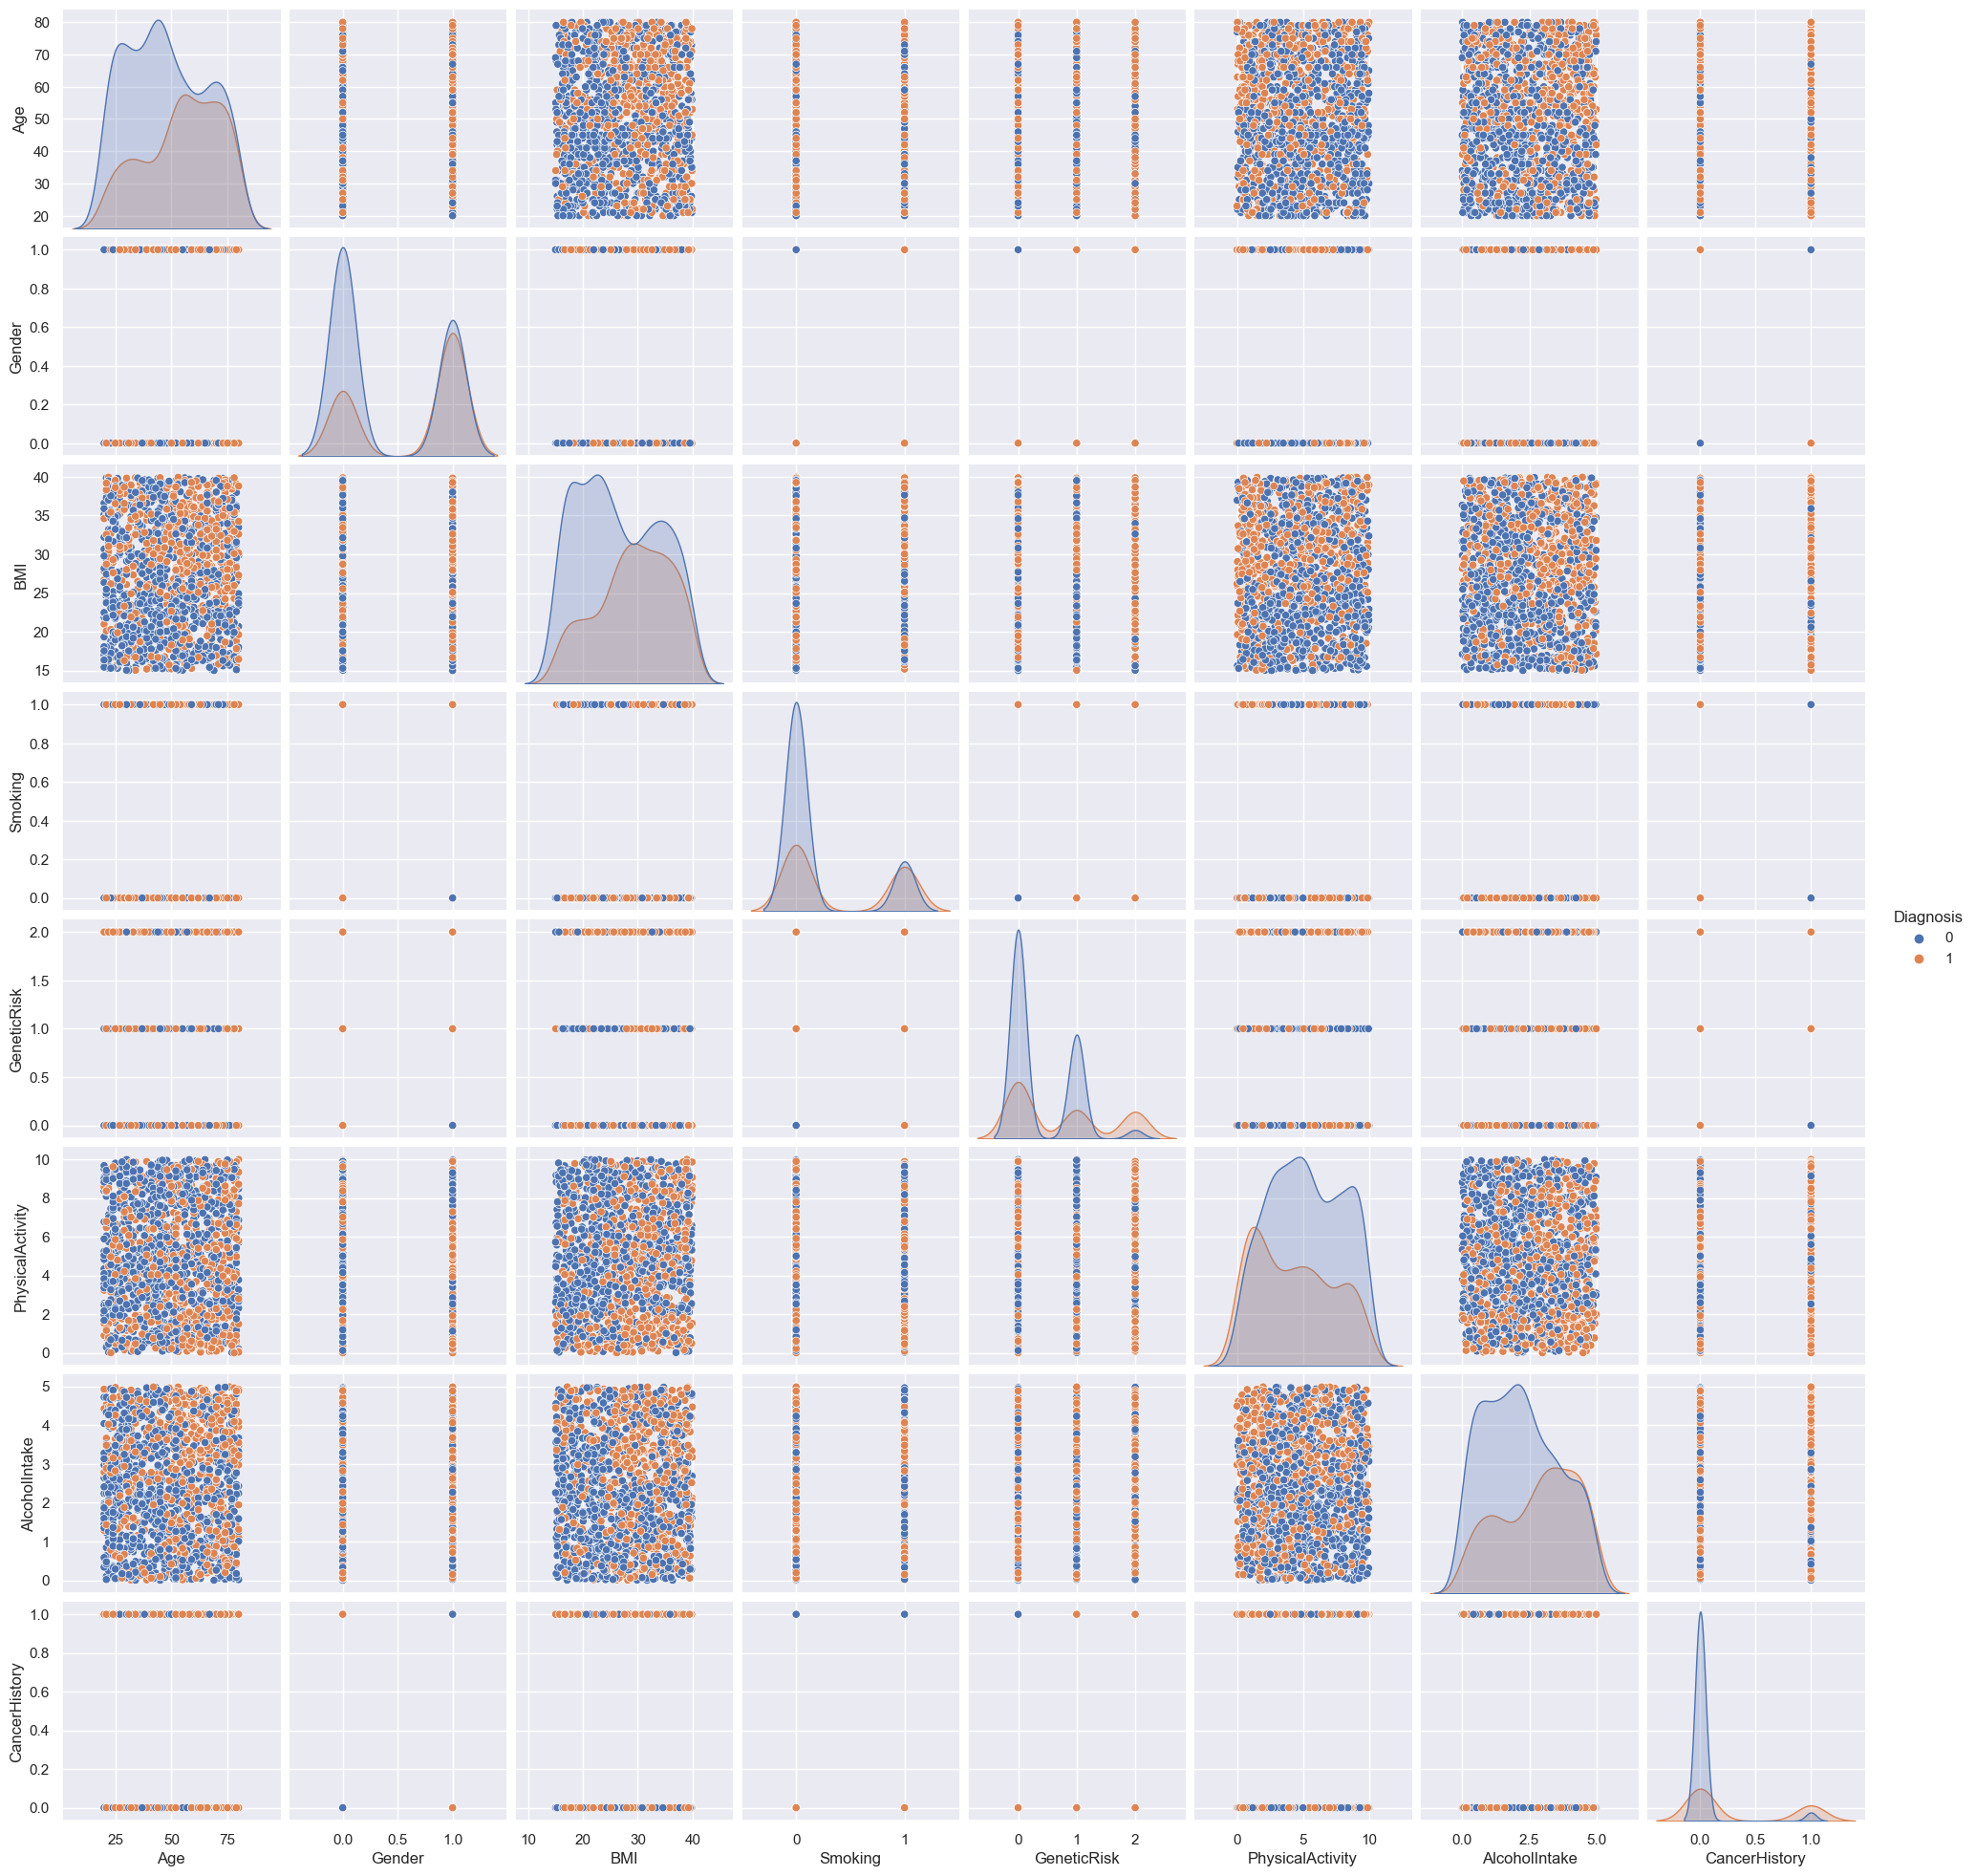

In [9]:
pplot=sns.pairplot(cancer, hue = 'Diagnosis') 

In [10]:
# Feature categorization
binary_features = ['Gender', 'Smoking', 'CancerHistory', 'Diagnosis']
continuous_features = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
categorical_features = ['GeneticRisk']

# Copy for modeling
X_model = cancer.copy()

# Labeling:

cancer['Gender'] = cancer['Gender'].replace({0: 'Male', 1: 'Female'})
cancer['Diagnosis'] = cancer['Diagnosis'].replace({0: 'No Cancer', 1: 'Cancer'})
cancer['Smoking'] = cancer['Smoking'].replace({0: 'No', 1: 'Yes'})
cancer['CancerHistory'] = cancer['CancerHistory'].replace({0: 'No', 1: 'yes'})
cancer['GeneticRisk'] = cancer['GeneticRisk'].replace({0: 'Low', 1: 'Medium', 2:'High'})

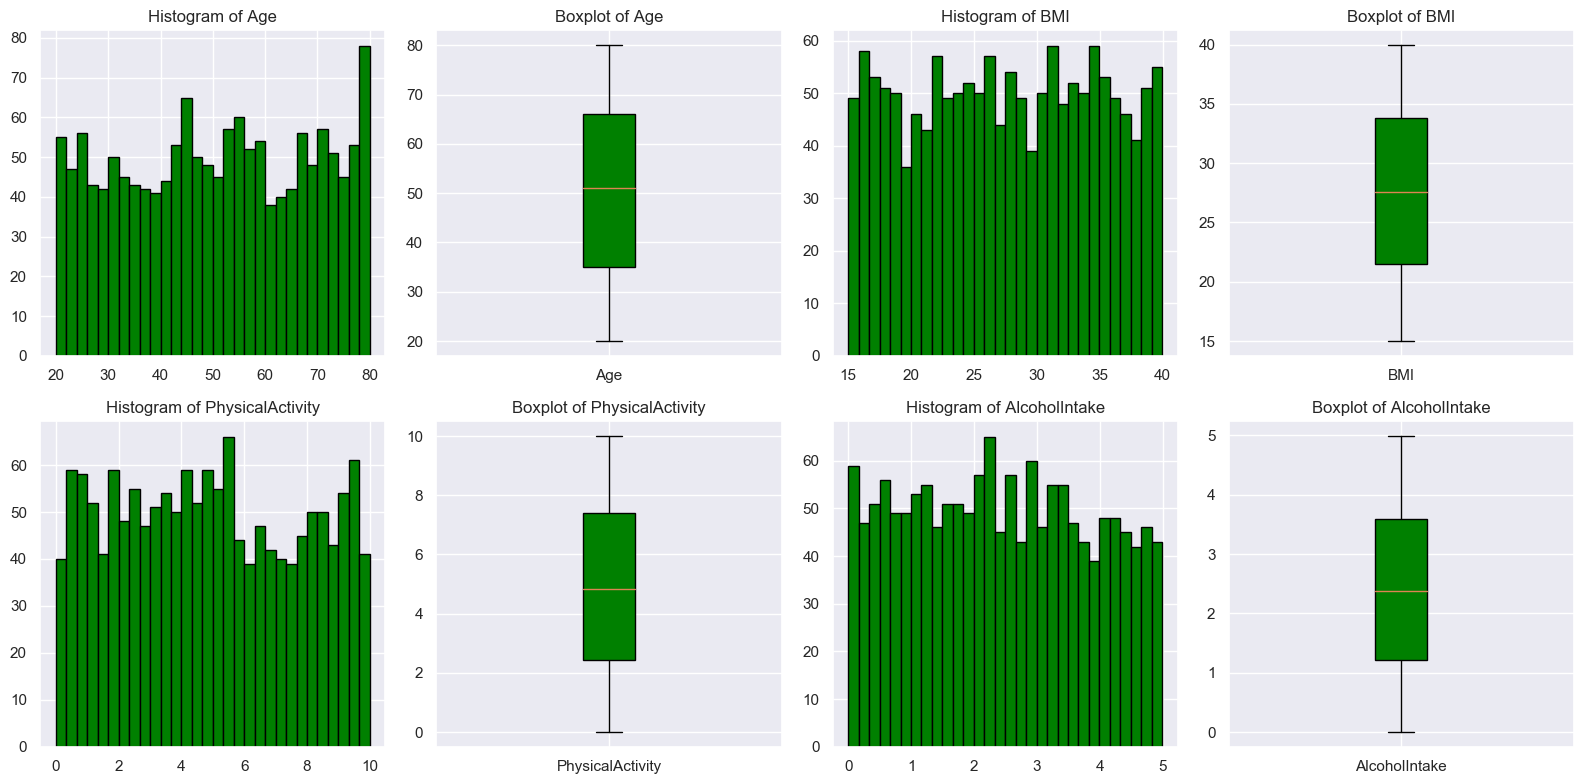

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, feature in enumerate(continuous_features):
    # Histogram
    ax_hist = axes[i // 2, (i % 2) * 2]
    ax_hist.hist(cancer[feature].dropna(), bins=30, color='green', edgecolor='black')
    ax_hist.set_title(f'Histogram of {feature}')
    
    # Boxplot
    ax_box = axes[i // 2, (i % 2) * 2 + 1]
    ax_box.boxplot(cancer[feature].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='green'))
    ax_box.set_title(f'Boxplot of {feature}')
    ax_box.set_xticks([1])
    ax_box.set_xticklabels([feature])

plt.tight_layout()
plt.show()

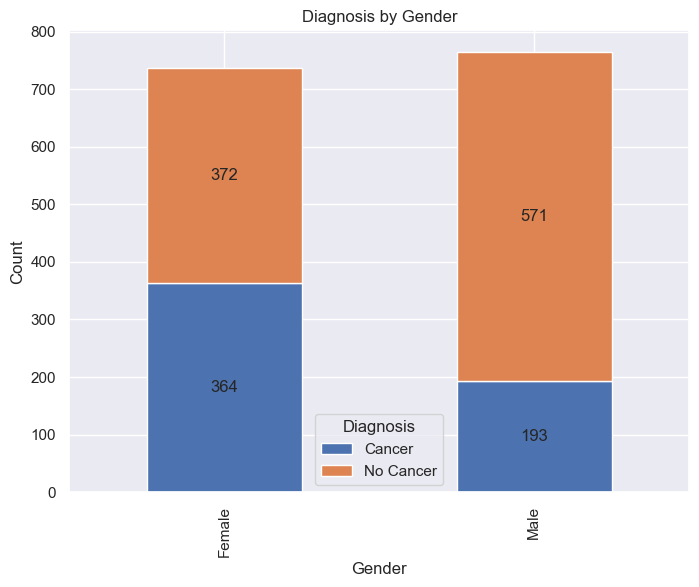

In [12]:
# Create a crosstab of Gender vs Diagnosis
crosstab = pd.crosstab(cancer['Gender'], cancer['Diagnosis'])

# Plot the stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add custom labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.0f}', (x, y), ha='center', va='center')

# Set the title and labels
plt.title('Diagnosis by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')

# Save as PNG
plt.savefig("Diagnosis by Gender.png", bbox_inches='tight')

# Show plot
plt.show()


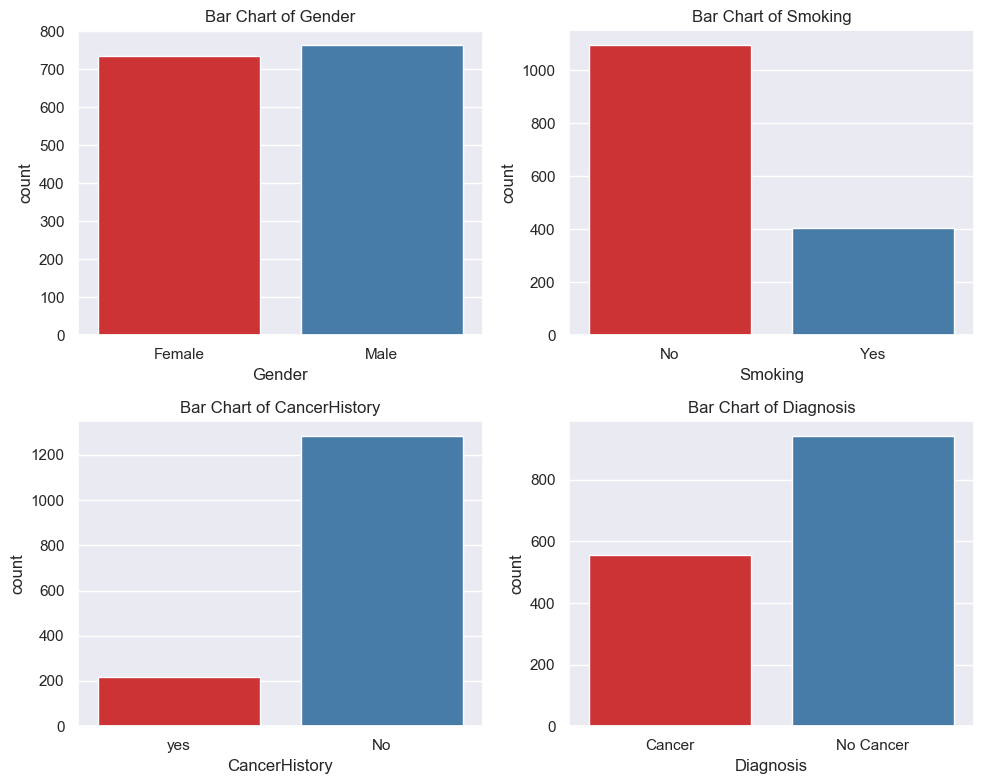

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, feature in enumerate(binary_features):
    sns.countplot(data=cancer, x=feature, ax=axes[i // 2, i % 2], palette='Set1')
    axes[i // 2, i % 2].set_title(f'Bar Chart of {feature}')

plt.tight_layout()
plt.savefig("Binary Features Breakdown.png",bbox_inches='tight')
plt.show()

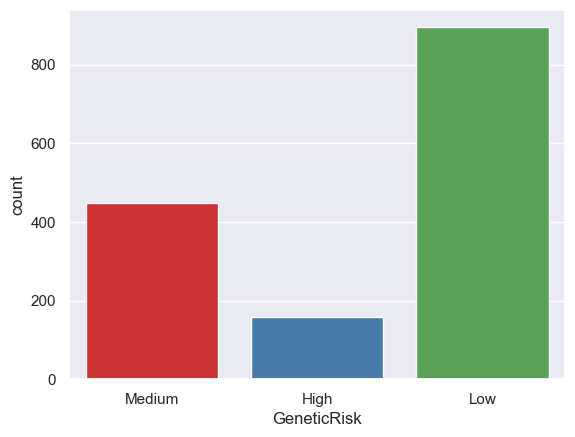

In [14]:
sns.countplot(data=cancer, x='GeneticRisk', palette='Set1')

plt.savefig("Count of Genetic Risk.png", bbox_inches='tight')

plt.show()

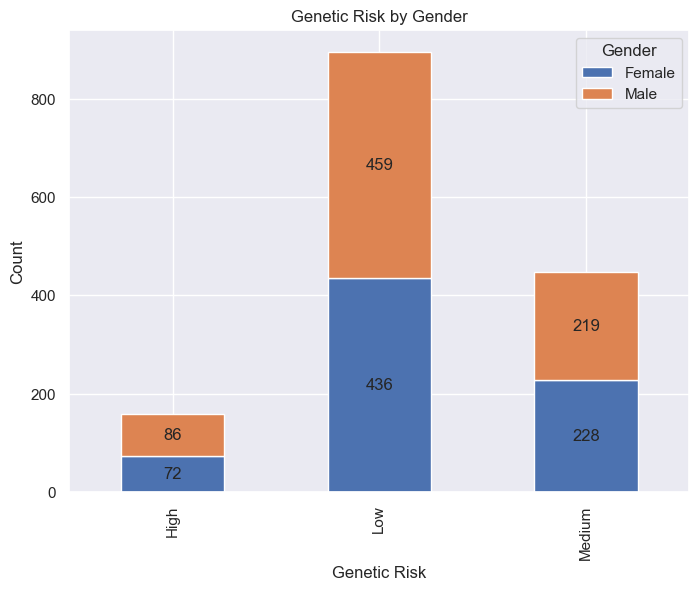

In [15]:
# Create a crosstab of Gender vs Diagnosis
crosstab = pd.crosstab(cancer['GeneticRisk'], cancer['Gender'])

# Plot the stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add custom labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.0f}', (x, y), ha='center', va='center')

# Set the title and labels
plt.title('Genetic Risk by Gender')
plt.ylabel('Count')
plt.xlabel('Genetic Risk')

# Save as PNG
plt.savefig("Genetic Risk by Gender.png", bbox_inches='tight')

# Show plot
plt.show()


Diagnosis
No Cancer    943
Cancer       557
Name: count, dtype: int64


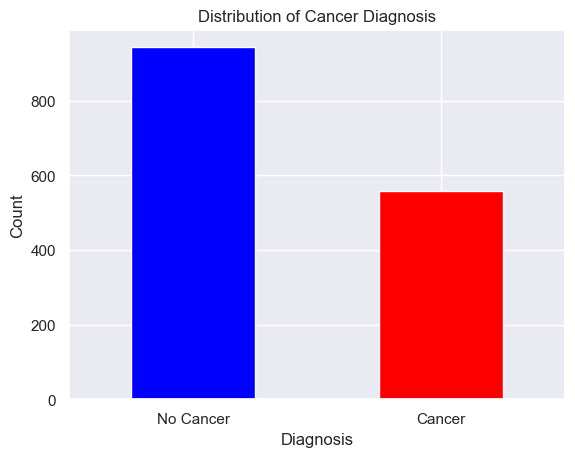

In [16]:
## checking the balance of the data by plotting the count of outcomes by their value
labels = ["No Cancer", "Cancer"]
print(cancer.Diagnosis.value_counts())
px=cancer.Diagnosis.value_counts().plot(kind="bar", color=['blue', 'red'])

# Rename x-axis labels
px.set_xticklabels(labels, rotation=0)  

# Add labels
px.set_xlabel("Diagnosis")
px.set_ylabel("Count")
px.set_title("Distribution of Cancer Diagnosis")

plt.savefig("Distribution of Cancer Diagnosis.png")
plt.show()

<h2>Scaling the Data</h2>

In [17]:
# Define the target and features
X = X_model.drop('Diagnosis', axis=1)
y = X_model['Diagnosis']

In [18]:
print(binary_features)

['Gender', 'Smoking', 'CancerHistory', 'Diagnosis']


In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define the feature categories
binary_features = ['Gender', 'Smoking', 'CancerHistory']
continuous_features = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
categorical_features = ['GeneticRisk']

# Initialize the transformers
scaler = StandardScaler()
binary_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer = SimpleImputer(strategy='most_frequent')
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Scale the continuous features
X_continuous_scaled = scaler.fit_transform(X[continuous_features])

# Impute the binary features
X_binary_imputed = binary_imputer.fit_transform(X[binary_features])

# Impute and one-hot encode the categorical features
X_categorical_imputed = categorical_imputer.fit_transform(X[categorical_features])
X_categorical_encoded = onehot_encoder.fit_transform(X_categorical_imputed).toarray()  # Convert sparse to dense

# Concatenate all the transformed features
X_transformed = np.hstack([X_continuous_scaled, X_binary_imputed, X_categorical_encoded])

# X_transformed is now ready for model training


<h2>Picking a Model</h2>

## 📚 StratifiedKFold Summary

### 🔍 Use
- Splits the dataset into `k` folds **while preserving the class distribution**.
- Ensures each fold has a similar proportion of target classes.
- Helps provide **fair, balanced evaluation** — especially for classification tasks with imbalanced data.

---

### ✅ Benefits
- Reduces the risk of **overfitting** to a specific train/test split.
- Gives a **more accurate and stable performance estimate**.
- Great for **smaller or imbalanced datasets**.

---

### 📊 `k` Recommendation (for 1,500 rows)
| `k` Value | When to Use                      | Notes                                            |
|-----------|----------------------------------|--------------------------------------------------|
| `k = 5`   | Default, balanced choice         | Good balance of speed and accuracy *(recommended)* |
| `k = 10`  | When you want more stability     | More robust estimates, but slower                |
| `k < 5`   | Not recommended for your size    | Less reliable results due to fewer splits        |

> ✅ **Recommended for you:** `k = 5` or `k = 10` depending on training time and precision needs.


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

# Define models for evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
}

# Evaluate each model using Stratified k-Fold Cross-Validation
results = {}
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

for model_name, model in models.items():
    scores = cross_val_score(model, X_transformed, y, cv=skf, scoring='accuracy')
    results[model_name] = {
        'Accuracy': scores.mean()
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy
Logistic Regression  0.882000
Random Forest        0.915333


## 📊 Logistic Regression Model Performance Summary  

The model achieved an **accuracy of 84%**, meaning it correctly classified **84% of the total samples**.  

### **Class 0**  
- **Precision:** 0.87 (**87%** of predicted Class 0 cases were correct)  
- **Recall:** 0.88 (**88%** of actual Class 0 cases were correctly identified)  
- **F1-score:** 0.88 (good balance between precision & recall)  

### **Class 1**  
- **Precision:** 0.80 (**80%** of predicted Class 1 cases were correct)  
- **Recall:** 0.77 (**77%** of actual Class 1 cases were correctly identified)  
- **F1-score:** 0.79 (indicating a solid but slightly lower ability to identify Class 1 cases)  

>### **Overall Performance:**  
>- **Macro Average F1-score:** 0.83 (balanced across both classes)  
>- **Weighted Average F1-score:** 0.84 (accounts for class imbalance)  
>
>📌 **Takeaway:** The model performs well overall, with slightly lower recall for Class 1, suggesting **some missed cases in this category**. 


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       189
           1       0.80      0.77      0.79       111

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



### For Linear Models (Logistic Regression, Linear Regression, etc.):
In linear models, you can use coefficients (for regression) or odds ratios (for logistic regression) to understand the significance of each variable.

**Interpretation:** The ***sign*** (positive/negative) of the coefficient tells you the direction of the relationship (positive means higher values increase the odds of the outcome). The ***magnitude*** tells you the strength of the relationship. Larger absolute values indicate more significant features.
For statistical significance in linear models, you can also use p-values from a statistical test like Wald tests.

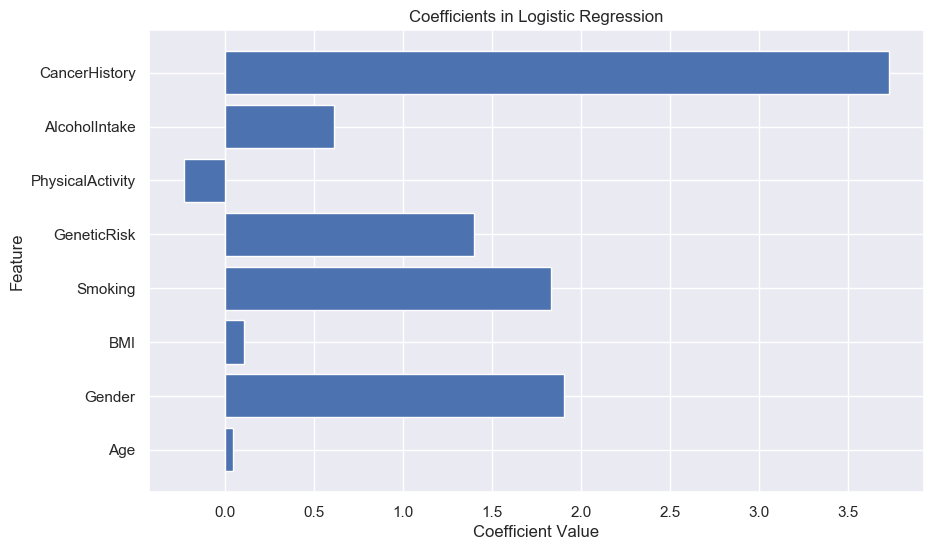

In [22]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_[0]

# Visualize the coefficients (logistic regression)
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients in Logistic Regression')
plt.show()


In [25]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit the logistic regression model
log_reg = sm.Logit(y_train, X_train_with_const)
result = log_reg.fit()

# Get p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.347645
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1191
Method:                           MLE   Df Model:                            8
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.4731
Time:                        18:23:33   Log-Likelihood:                -417.17
converged:                       True   LL-Null:                       -791.80
Covariance Type:            nonrobust   LLR p-value:                1.763e-156
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.1965      0.710    -14.354      0.000     -11.589      -8.804
Age        

## X_transformed Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split data into training (80%) and testing (20%) sets
# Using the transformed features (X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       189
           1       0.84      0.82      0.83       111

    accuracy                           0.88       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.88      0.88      0.88       300



## 📊 Random Forest Model  
The random forest model achieved an **accuracy of 94%**, meaning it correctly classified **94% of the total samples**.  

#### **Class 0**  
- **Precision:** 0.93 (**93%** of predicted Class 0 cases were correct)  
- **Recall:** 0.97 (**97%** of actual Class 0 cases were correctly identified)  
- **F1-score:** 0.95 (excellent balance between precision & recall)  

#### **Class 1**  
- **Precision:** 0.95 (**95%** of predicted Class 1 cases were correct)  
- **Recall:** 0.88 (**88%** of actual Class 1 cases were correctly identified)  
- **F1-score:** 0.92 (good balance, but room for slight improvement in recall)  

>#### **Overall Performance:**  
>- **Macro Average F1-score:** 0.93 (well-balanced performance across both classes)  
>- **Weighted Average F1-score:** 0.94 (takes class imbalance into account)  
>
>📌 **Takeaway:** The random forest model performs **exceptionally well**, with strong precision and recall across both classes. The slightly lower recall for Class 1 suggests room for improvement in identifying all Class 1 cases, but overall, the model is highly reliable. 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", report_rf)


Random Forest Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       189
           1       0.95      0.88      0.92       111

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300



### For Tree-Based Models (Random Forest, Decision Trees, etc.):
Tree-based models provide feature importance based on how well each feature splits the data. The more a feature contributes to reducing impurity (like Gini index or entropy), the more important it is.

**Interpretation:** The higher the value of feature importance, the more significant the feature is in predicting the target variable.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Fit the Random Forest model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Get feature importance scores
feature_importances = model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Age: 0.13903870378804623
Gender: 0.0727504754202212
BMI: 0.1620834724574617
Smoking: 0.05314970324995839
GeneticRisk: 0.12210583074086241
PhysicalActivity: 0.13822379712285388
AlcoholIntake: 0.16780942403143378
CancerHistory: 0.1448385931891624


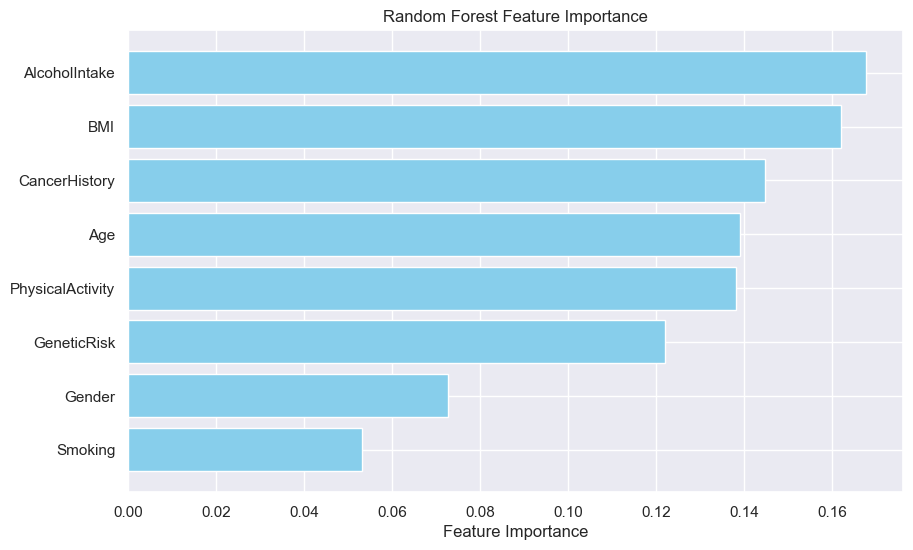

In [36]:
# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top

# Save as PNG
plt.savefig("Random Forest - Feature Importance.png", bbox_inches='tight')

plt.show()

In [37]:
print("Class distribution in y_test:")
print(np.unique(y_test, return_counts=True))

print("Class distribution in y_pred_rf:")
print(np.unique(y_pred_rf, return_counts=True))


Class distribution in y_test:
(array([0, 1]), array([189, 111]))
Class distribution in y_pred_rf:
(array([0, 1]), array([197, 103]))


In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


[[184   5]
 [ 13  98]]


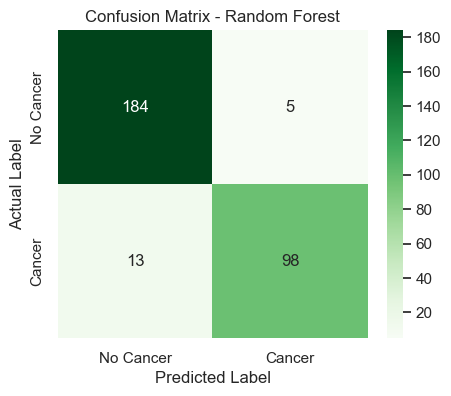

In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

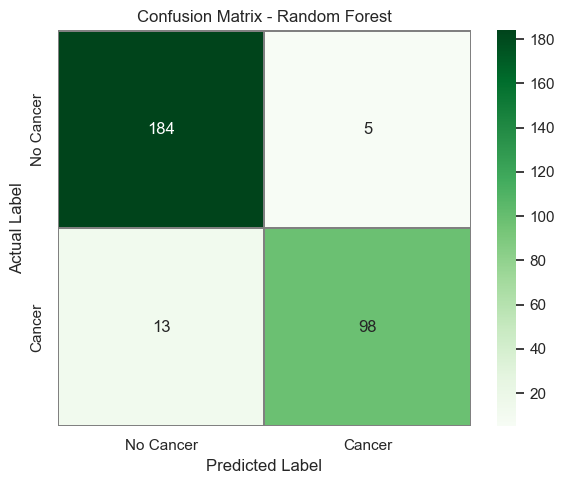

In [40]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['No Cancer', 'Cancer'],
    yticklabels=['No Cancer', 'Cancer'],
    cbar=True,
    linewidths=1,
    linecolor='gray'
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()